## Importing of Libraries

In [45]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import joblib

import warnings

from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from scipy.stats import uniform, randint

In [46]:
churn_data = pd.read_excel('./customer_churn_large_dataset.xlsx', index_col = 0)

In [47]:
churn_data

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,,,,,,,,
1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
2,Customer_2,62,Female,New York,1,48.76,172,0
3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
4,Customer_4,36,Female,Miami,3,97.94,297,1
5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...
99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99997,Customer_99997,62,Female,New York,19,61.65,351,0
99998,Customer_99998,64,Male,Chicago,17,96.11,251,1


## Data Exploration

In [48]:
print("Overview of the dataset")
print("Number of Rows: ", churn_data.shape[0])
print("Number of Columns: ", churn_data.shape[1])
print("Data Features: ")
print(churn_data.columns.tolist())

Overview of the dataset
Number of Rows:  100000
Number of Columns:  8
Data Features: 
['Name', 'Age', 'Gender', 'Location', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']


In [49]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 100000
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Name                        100000 non-null  object 
 1   Age                         100000 non-null  int64  
 2   Gender                      100000 non-null  object 
 3   Location                    100000 non-null  object 
 4   Subscription_Length_Months  100000 non-null  int64  
 5   Monthly_Bill                100000 non-null  float64
 6   Total_Usage_GB              100000 non-null  int64  
 7   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 6.9+ MB


In [50]:
# Null values - No null values
churn_data.isnull().sum()

Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [51]:
# Unique values 
churn_data.nunique()

Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

In [52]:
churn_data.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


## Data Visualization

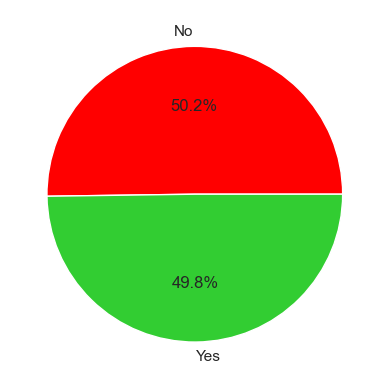

In [53]:
plt.pie(churn_data['Churn'].value_counts(), labels = ['No', 'Yes'], autopct='%1.1f%%', colors=['red','limegreen']);

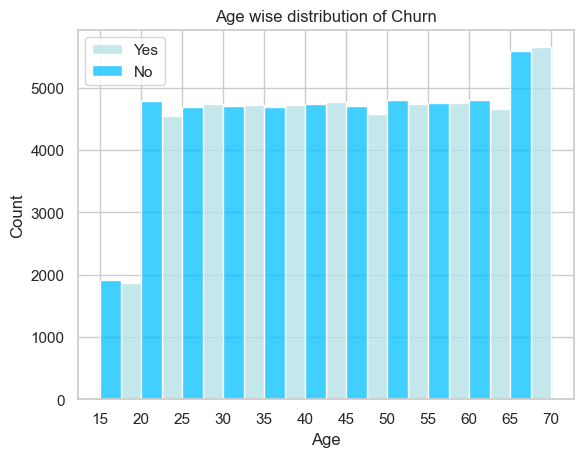

In [54]:

sns.set_palette(['deepskyblue','powderblue'])
num_bins = 5
bins = range(15, max(churn_data['Age']) + num_bins, num_bins)

sns.histplot(data=churn_data, x='Age', hue='Churn', multiple='dodge', bins=bins);
plt.xticks(bins);

plt.title("Age wise distribution of Churn");
plt.legend(['Yes','No']);

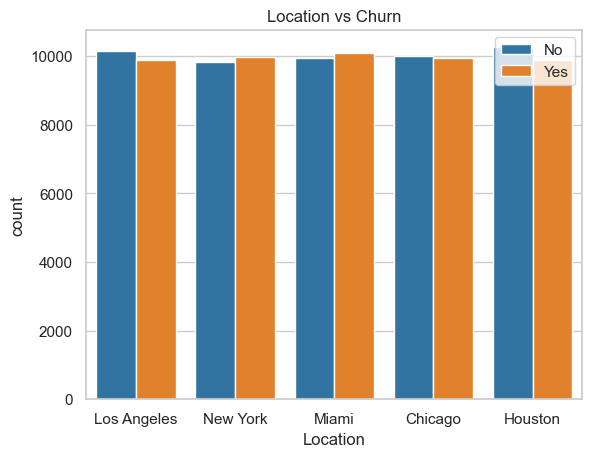

In [55]:
sns.set_palette("tab10")
sns.countplot(data=churn_data, x='Location', hue='Churn')
plt.legend(['No', 'Yes']);
plt.title("Location vs Churn");

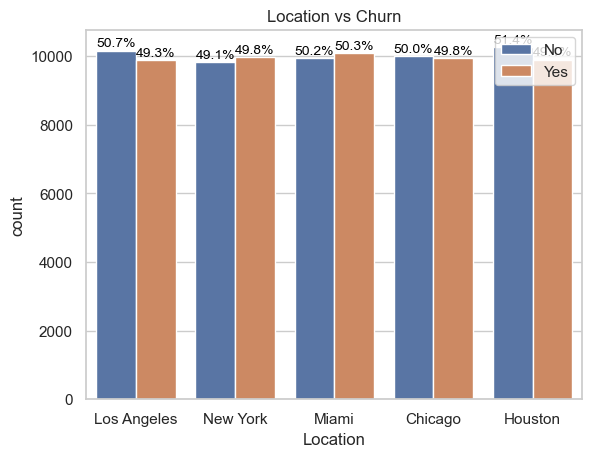

<Figure size 2000x1200 with 0 Axes>

In [56]:
# Your data and plot settings
sns.set_palette("tab10")
sns.set(style="whitegrid")

# Create the countplot
ax = sns.countplot(data=churn_data, x='Location', hue='Churn')
plt.legend(['No', 'Yes'])
plt.title("Location vs Churn")

# Calculate percentage values
total_counts = churn_data.groupby('Location')['Churn'].count()
for p in ax.patches:
    height = p.get_height()
    location = churn_data['Location'].unique()[int(p.get_x())]
    churn_status = 'Yes' if p.get_x() > 0 else 'No'
    percentage = (height / total_counts[location]) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height - 3.5),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.figure(figsize=(20,12));
plt.show()

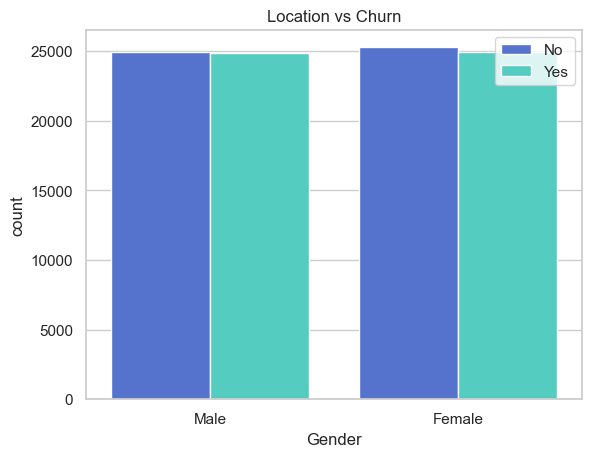

In [57]:
sns.set_palette(['royalblue','turquoise'])
sns.countplot(data=churn_data, x='Gender', hue='Churn')
plt.legend(['No', 'Yes']);
plt.title("Location vs Churn");

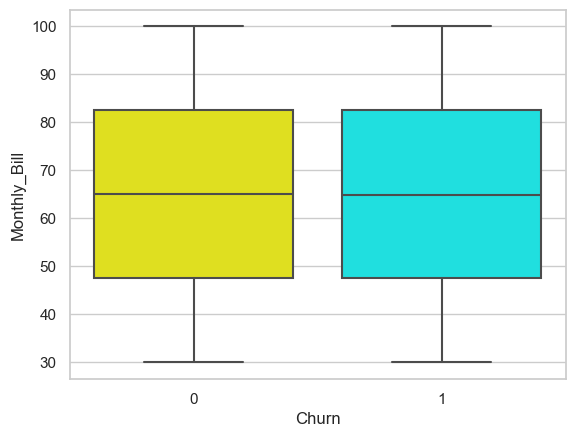

In [118]:
sns.set_palette(['yellow','cyan'])
sns.boxplot(data=churn_data, x = 'Churn', y = 'Monthly_Bill');

<Axes: xlabel='Monthly_Bill', ylabel='Count'>

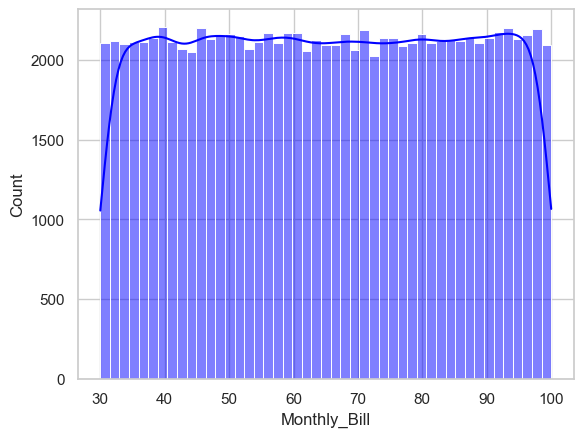

In [133]:
sns.histplot(data=churn_data, x='Monthly_Bill', kde=True, color='blue')

From the data visualized above. We can observe that the data has a equal distribution across all the of features. 

## Data Preprocessing

I have used one-hot encoding here to encode the categorical columns because one-hot prevents the machine learning model to establish any ranking or order between the labels in case of a ordinary Label encoder. It helps model to learn better.

In [104]:
data = pd.get_dummies(churn_data, columns = ['Gender', 'Location'])

In [105]:
data

,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
CustomerID,,,,,,,,,,,,,
1,Customer_1,63,17,73.36,236,0,0,1,0,0,1,0,0
2,Customer_2,62,1,48.76,172,0,1,0,0,0,0,0,1
3,Customer_3,24,5,85.47,460,0,1,0,0,0,1,0,0
4,Customer_4,36,3,97.94,297,1,1,0,0,0,0,1,0
5,Customer_5,46,19,58.14,266,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,Customer_99996,33,23,55.13,226,1,0,1,0,1,0,0,0
99997,Customer_99997,62,19,61.65,351,0,1,0,0,0,0,0,1
99998,Customer_99998,64,17,96.11,251,1,0,1,1,0,0,0,0


In [106]:
## Dropping Name since Customer ID is a unique id to identify the customer
data.drop(columns=['Name'], inplace = True)

In [107]:
data

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
CustomerID,,,,,,,,,,,,
1,63,17,73.36,236,0,0,1,0,0,1,0,0
2,62,1,48.76,172,0,1,0,0,0,0,0,1
3,24,5,85.47,460,0,1,0,0,0,1,0,0
4,36,3,97.94,297,1,1,0,0,0,0,1,0
5,46,19,58.14,266,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99996,33,23,55.13,226,1,0,1,0,1,0,0,0
99997,62,19,61.65,351,0,1,0,0,0,0,0,1
99998,64,17,96.11,251,1,0,1,1,0,0,0,0


<Axes: >

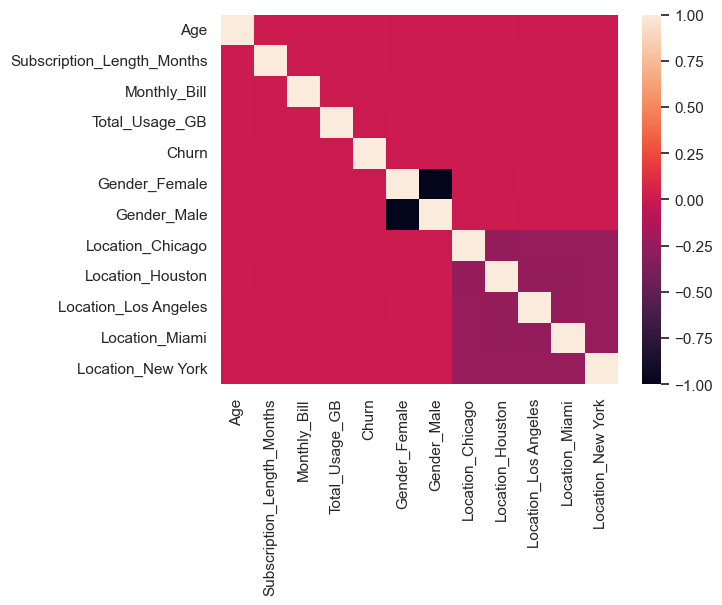

In [108]:
sns.heatmap(data.corr())

The above heatmap shows that the relation between the target variable and other features is very low. This will adversely affect the model performance. 

## Modelling

In [109]:
X = data.drop(columns=['Churn'])
y = data[['Churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [110]:
print("Shape of Training Data: ", X_train.shape, y_train.shape)
print("Shape of Testing Data: ", X_test.shape, y_test.shape)

Shape of Training Data:  (80000, 11) (80000, 1)
Shape of Testing Data:  (20000, 11) (20000, 1)


In [112]:
names = [
    "Nearest Neighbors",  
    "Decision Tree", 
    "Random Forest",  
    "AdaBoost", 
    "Naive Bayes", 
    "XGBoost",
    "CatBoost",
    "LightGBM"
]

classifiers = [
    KNeighborsClassifier(2),  
    DecisionTreeClassifier(max_depth = 5), 
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), 
    AdaBoostClassifier(), 
    GaussianNB(), 
    xgb.XGBClassifier(),
    CatBoostClassifier(verbose=False), 
    LGBMClassifier() 
    
]

results = pd.DataFrame(columns=["Model", "Accuracy", "F1-Score", "Recall", "Precision", "ROC AUC"])

In [152]:
warnings.filterwarnings("ignore")

for name, clf in zip(names, classifiers):
    clf = make_pipeline(StandardScaler(), clf) 
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test) 
    y_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
    
    accuracy = np.mean(y_pred==[y_test]) 
    f1 = classification_report(y_test, y_pred, output_dict = True)["macro avg"]["f1-score"]
    recall = classification_report(y_test, y_pred, output_dict = True)["macro avg"]["recall"]
    precision = classification_report(y_test, y_pred, output_dict = True)["macro avg"]["precision"]
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None 
    
    results = results.append({"Model": name, "Accuracy": accuracy, "F1-Score": f1, "Recall" : recall, "Precision": precision, "ROC AUC": roc_auc}, ignore_index=True)

    
print(results.to_string(index = False))

            Model  Accuracy  F1-Score   Recall  Precision  ROC AUC
Nearest Neighbors  0.501997  0.462198 0.495653   0.494160 0.495886
    Decision Tree  0.500270  0.495015 0.495480   0.495459 0.499412
    Random Forest  0.500501  0.492695 0.494498   0.494409 0.493492
         AdaBoost  0.500442  0.501759 0.503108   0.503147 0.501754
      Naive Bayes  0.500833  0.498644 0.503817   0.503994 0.503347
          XGBoost  0.500077  0.498655 0.498672   0.498672 0.498772
         CatBoost  0.500173  0.492460 0.492626   0.492612 0.492773
         LightGBM  0.500424  0.497380 0.498626   0.498610 0.496269
Nearest Neighbors  0.501997  0.462198 0.495653   0.494160 0.495886
    Decision Tree  0.500270  0.495015 0.495480   0.495459 0.499412
    Random Forest  0.500804  0.494553 0.499396   0.499370 0.496759
         AdaBoost  0.500442  0.501759 0.503108   0.503147 0.501754
      Naive Bayes  0.500833  0.498644 0.503817   0.503994 0.503347
          XGBoost  0.500077  0.498655 0.498672   0.498672 0.49

From above we can see that Adaboost, LightGBM and XGBoost models were among the top scorer. Hence we continue with these models and try different hyperparameters to obtain the best results.

## Hyperparameter tuning

In [114]:
adaboost = AdaBoostClassifier() 

param_dist = {
    'n_estimators': np.arange(50, 300, 10), 
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5], 
    'algorithm': ['SAMME', "SAMME.R"]
}

random_search = RandomizedSearchCV(adaboost, param_distributions=param_dist, n_iter=10, cv=5, random_state = 42)

random_search.fit(X_train, y_train) 

print("Best Hyperparameters ", random_search.best_params_)
print("Best Score ", random_search.best_score_)

Best Hyperparameters  {'n_estimators': 140, 'learning_rate': 0.2, 'algorithm': 'SAMME.R'}
Best Score  0.5027125


In [116]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Define hyperparameter ranges for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 3, 5, 7],
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_classifier,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='accuracy',  # Use appropriate metric
    cv=3,  # Number of cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1,  # Use all available CPU cores
)

# Perform RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Hyperparameters: {'colsample_bytree': 0.679536961635522, 'gamma': 0.2, 'learning_rate': 0.2470526621593617, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 283, 'subsample': 0.7433862914177091}
Best Score: 0.5035749782820957


In [121]:
# Create an LGBM classifier
lgbm_classifier = LGBMClassifier()

# Define hyperparameter ranges for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_samples': randint(10, 100),
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    lgbm_classifier,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='accuracy',  # Use appropriate metric
    cv=3,  # Number of cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1,  # Use all available CPU cores
)

# Perform RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Hyperparameters: {'colsample_bytree': 0.821105986734196, 'learning_rate': 0.1816877407512515, 'max_depth': 6, 'min_child_samples': 72, 'n_estimators': 352, 'subsample': 0.7540390914407701}
Best Score: 0.5038375007824589


## Emsembling of top models

In [139]:
adaboost = AdaBoostClassifier(n_estimators= 140, learning_rate=0.2, algorithm='SAMME.R') 
lgbm_model = LGBMClassifier(colsample_bytree= 0.821105986734196, max_depth= 6, learning_rate= 0.1816877407512515, subsample= 0.7540390914407701, min_child_samples =  72, n_estimators= 352) 
xgb_model = xgb.XGBClassifier(colsample_bytree= 0.679536961635522, gamma=0.2, learning_rate=0.2470526621593617, max_depth= 5, min_child_weight= 1, n_estimators= 283, subsample= 0.7433862914177091) 


ensemble = VotingClassifier(
    estimators = [
        ('lgbm', lgbm_model), 
        ('xgb', xgb_model),
        ('adaboost',adaboost)
    ], 
    voting = 'hard'
            
)

ensemble.fit(X_train, y_train)



# Make predictions using the ensemble
ensemble_predictions = ensemble.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", accuracy)

Ensemble Accuracy: 0.5029


In [144]:
ensemble.predict(np.array(X_train.iloc[0]).reshape(1,-1))

array([1], dtype=int64)

## Saving the model

In [148]:
model_filename = 'churn_model.joblib'
joblib.dump(ensemble, model_filename)
print(f"Model saved as {model_filename}")

Model saved as churn_model.joblib
